# Uber Analysis Insights

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import datetime
import sweetviz as sv


import IPython


In [5]:
dt=pd.read_csv(r"C:\Users\Laptop\Downloads\Uber Drives - .csv")

In [6]:
dt.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Cleaning the Data

In [7]:
dt.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

<AxesSubplot:>

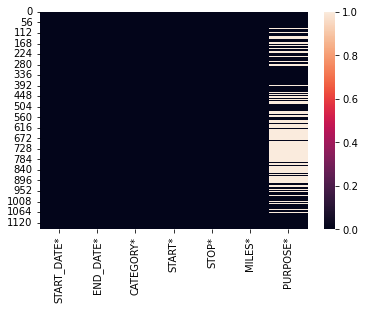

In [8]:
sns.heatmap(dt.isnull())

In [9]:
dt=dt.dropna()

In [10]:
dt.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
dt.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [12]:
dt['START_DATE*']=dt['START_DATE*'].astype('datetime64')
dt['END_DATE*']=dt['END_DATE*'].astype('datetime64')

In [20]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in dt['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
dt['HOUR']=hour
dt['DAY']=day
dt['DAY_OF_WEEK']=dayofweek
dt['MONTH']=month
dt['WEEKDAY']=weekday

In [21]:
dt.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday


In [22]:
dt.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
HOUR                    int64
DAY                     int64
DAY_OF_WEEK             int64
MONTH                   int64
WEEKDAY                object
dtype: object

How many Categories Do we have

In [23]:
dt['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

C:\Users\Laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

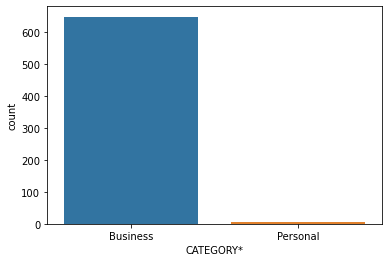

In [24]:
sns.countplot(dt['CATEGORY*'],data=dt) #countplot(column,data)

## How Long Do People Drive With Uber

Text(0.5, 1.0, 'How Long Do People Drive With Uber')

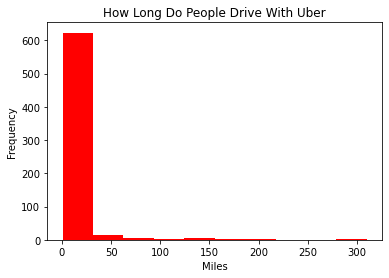

In [25]:
dt['MILES*'].plot.hist(color='red')
plt.xlabel('Miles')
plt.title('How Long Do People Drive With Uber')

## What Hours Do Most People take uber to their destination? 

Text(0.5, 1.0, 'What Hours Do Most People take uber?')

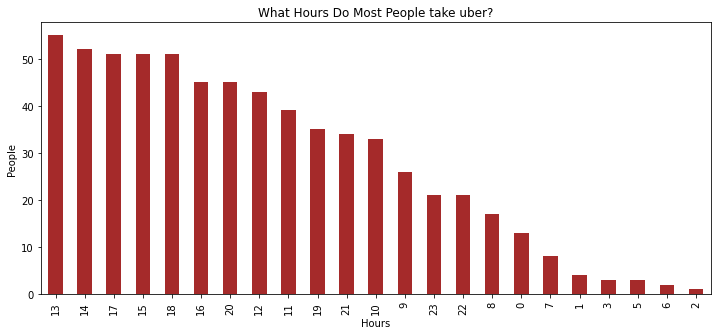

In [26]:
dt['START_DATE*'].dt.hour.value_counts().plot(kind='bar',color='brown',figsize=(12,5))
plt.xlabel('Hours')
plt.ylabel('People')
plt.title('What Hours Do Most People take uber?')


## Check The Purpose Of Trips

<AxesSubplot:>

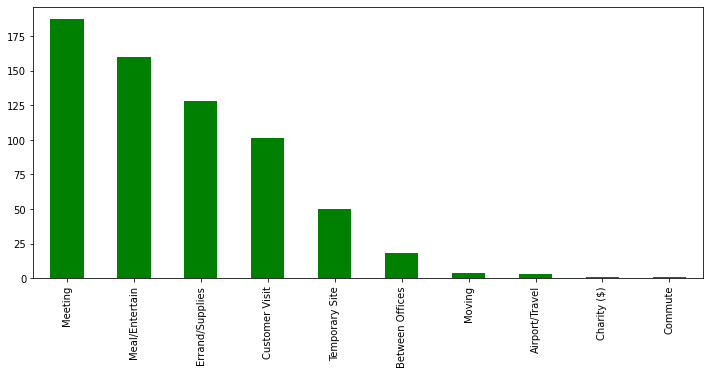

In [27]:
dt['PURPOSE*'].value_counts().plot(kind='bar',color='green',figsize=(12,5))

## Which Day has the Highest number of Trips

<AxesSubplot:>

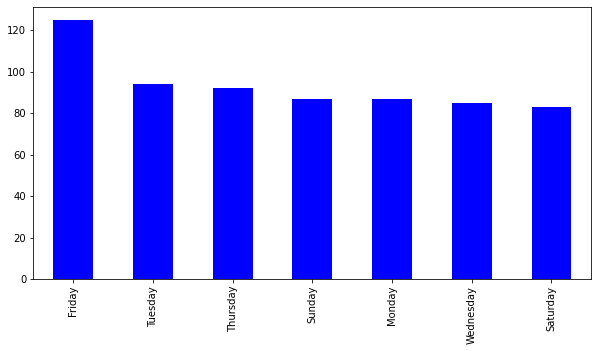

In [33]:
dt['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

## What are the number of Trips each day

In [34]:
dt.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday


<AxesSubplot:>

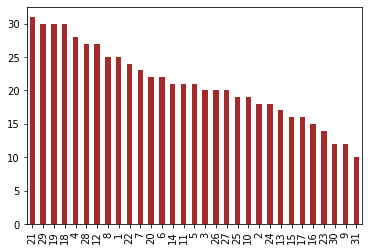

In [35]:
dt['START_DATE*'].dt.day.value_counts().plot(kind='bar',color='brown')

## What are the trips in the month?

<AxesSubplot:>

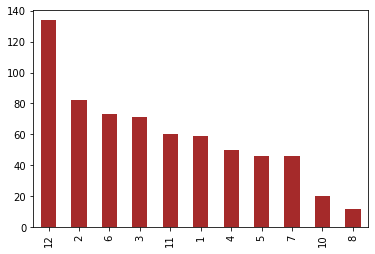

In [31]:
dt['START_DATE*'].dt.month.value_counts().plot(kind='bar',color='brown')

## The Starting points of Trips.Where do people starts Boarding their Trip from Most?

<AxesSubplot:>

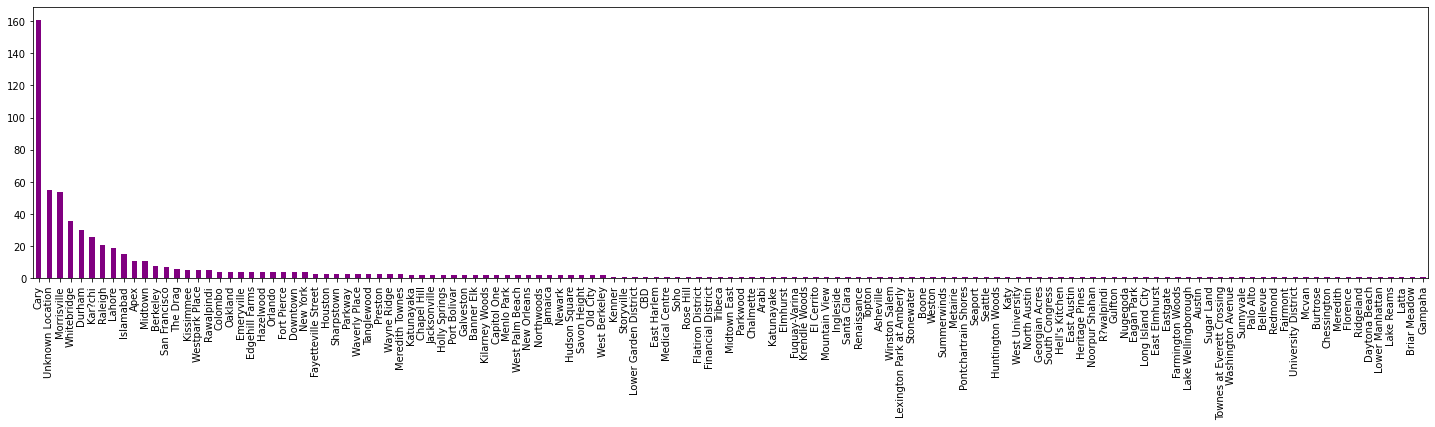

In [32]:
dt['START*'].value_counts().plot(kind='bar',color='purple',figsize=(25,5))